In [1]:
#Import library yang dibutuhkan

import pandas as pd
import numpy as np

In [2]:
#Load dataset

data = pd.read_csv('Studi Kasus Data HR - Studi Kasus Data HR.csv', sep=';')
data.head()

,Participant Code,Region,log_berpikir,k_numerikal,d_analisa,k_verbal,o_hasil,fleks,s_kerja,m_prestasi,kerjasama,k_interpersonal,pil_jabatan,prosen_kecocokan,hasil_rekomendasi
0,DCX_001,BALI NUSRA,2,2,3,3,3,3,3,2,3,4,SALES,91.67,Disarankan
1,DCX_002,BALI NUSRA,3,3,3,3,4,4,4,4,5,5,SALES,94.17,Disarankan
2,DCX_003,BALI NUSRA,3,3,4,3,5,3,4,4,5,4,SALES,94.17,Disarankan
3,DCX_004,BALI NUSRA,3,3,3,3,5,4,4,5,5,3,SALES,91.67,Disarankan
4,DCX_005,BALI NUSRA,3,2,3,3,3,3,3,2,4,3,SALES,91.67,Disarankan


# Inspeksi data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16354 entries, 0 to 16353
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Participant Code   16354 non-null  object 
 1   Region             13266 non-null  object 
 2   log_berpikir       16354 non-null  int64  
 3   k_numerikal        16354 non-null  int64  
 4   d_analisa          16354 non-null  int64  
 5   k_verbal           16354 non-null  int64  
 6   o_hasil            16354 non-null  int64  
 7   fleks              16354 non-null  int64  
 8   s_kerja            16354 non-null  int64  
 9   m_prestasi         16354 non-null  int64  
 10  kerjasama          16354 non-null  int64  
 11  k_interpersonal    16354 non-null  int64  
 12  pil_jabatan        16354 non-null  object 
 13  prosen_kecocokan   16354 non-null  float64
 14  hasil_rekomendasi  16354 non-null  object 
dtypes: float64(1), int64(10), object(4)
memory usage: 1.9+ MB


In [4]:
data.isnull().sum()

Participant Code        0
Region               3088
log_berpikir            0
k_numerikal             0
d_analisa               0
k_verbal                0
o_hasil                 0
fleks                   0
s_kerja                 0
m_prestasi              0
kerjasama               0
k_interpersonal         0
pil_jabatan             0
prosen_kecocokan        0
hasil_rekomendasi       0
dtype: int64

Terdapat missing value pada kolom region sebanyak 3088 baris. 

In [5]:
data.shape

(16354, 15)

Dimensi datanya adalah 16354 baris dan 15 kolom. Jika baris dengan nilai missing valuenya dihapus, maka akan kehilangan data sebanyak 18,88% dari total data keseluruhan. Jumlah ini tidak akan menghilangkan informasi yang signifikan dari data. Oleh karena itu, baris dengan missing value dihapus untuk memudahkan analisis.

In [6]:
data['Region'].unique()

array(['BALI NUSRA', 'HEAD OFFICE', 'JAKARTA', 'JAWA BARAT',
       'JAWA TENGAH', 'JAWA TIMUR', 'KALIMANTAN', 'SULAWESI',
       'SUMATERA 1', 'SUMATERA 2', '-', nan], dtype=object)

Hasil sintaks di atas memberikan informasi terdapat nilai '-' pada kolom region. Nilai ini diganti dengan string 'UNKNOWN REGION' untuk memudahkan analisis.

In [7]:
#Mencari tahu jumlah baris dengan nilai region '-'

region_nonvalid = (data['Region'] == '-').sum()
print(region_nonvalid)

8357


In [8]:
#Ganti nama '-' menjadi 'UNKNOWN'

data['Region'] = data['Region'].replace('-', 'UNKNOWN')

In [9]:
#Menghapus missing value

data = data.dropna(subset=['Region'])

In [10]:
data['Region'].unique()

array(['BALI NUSRA', 'HEAD OFFICE', 'JAKARTA', 'JAWA BARAT',
       'JAWA TENGAH', 'JAWA TIMUR', 'KALIMANTAN', 'SULAWESI',
       'SUMATERA 1', 'SUMATERA 2', 'UNKNOWN'], dtype=object)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13266 entries, 0 to 13265
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Participant Code   13266 non-null  object 
 1   Region             13266 non-null  object 
 2   log_berpikir       13266 non-null  int64  
 3   k_numerikal        13266 non-null  int64  
 4   d_analisa          13266 non-null  int64  
 5   k_verbal           13266 non-null  int64  
 6   o_hasil            13266 non-null  int64  
 7   fleks              13266 non-null  int64  
 8   s_kerja            13266 non-null  int64  
 9   m_prestasi         13266 non-null  int64  
 10  kerjasama          13266 non-null  int64  
 11  k_interpersonal    13266 non-null  int64  
 12  pil_jabatan        13266 non-null  object 
 13  prosen_kecocokan   13266 non-null  float64
 14  hasil_rekomendasi  13266 non-null  object 
dtypes: float64(1), int64(10), object(4)
memory usage: 1.6+ MB


In [12]:
#Mencari informasi statistik dalam data

informasi_statistik = data.groupby('pil_jabatan')['prosen_kecocokan'].agg(['mean', 'median', 'std'])

print(informasi_statistik)

                  mean  median       std
pil_jabatan                             
DBT          79.211520   79.17  5.559156
NON SALES    89.246476   90.00  6.999763
SALES        82.022004   81.67  7.115550


Jabatan NON sales memiliki nilai statistik tertinggi sedangkan jabatan DBT memiliki nilai statistik terendah. Nilai rata-rata dan mediannya memiliki selisih yang tidak signifikan yang berarti skor rata-rata dan skor mayoritasnya berada pada nilai tersebut. Jabatan SALES memiliki variasi nilai yang lebih besar daripada 2 jabatan lainnya yang menunjukkan sebarannya lebih tinggi.

**Visualisasi data untuk memcari informasi**

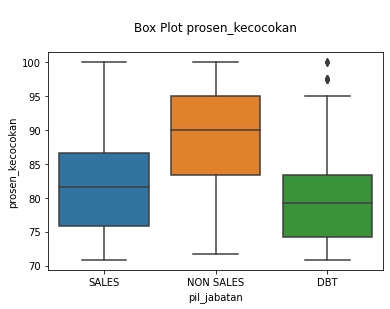

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

kolom_numerik = ['prosen_kecocokan']  
  
for i in kolom_numerik:  
    plt.figure(figsize=(6,4))  
    ax = sns.boxplot(x = 'pil_jabatan',y = i, data = data)  
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)  
    plt.savefig('Visualisasi_Hasil_prosen_kecocokan.png')
    plt.show() 

Berdasarkan hasil visualisasi di atas, skor prosen_kecocokan untuk ketiga jabatan memiliki nilai minimum yang setara. Sedangkan untuk nilai maksimalnya, jabatan DBT cenderung memiliki skor maksimal yang lebih rendah daripada 2 jabatan lainnya, yaitu sekitar 95. Namun, terdapat outlier yang memberikan informasi bahwa terdapat 2 kandidat dengan skor di atas 95.

- Untuk jabatan SALES, sebanyak 75% kandidatnya memiliki skor kurang dari 87 dan 25% sisanya memiliki skor lebih dari 87. Skor tertingginya adalah 100 dan terendahnya sekitar 71. Sebaran variasi skornya berada pada rentang skor 76-87.
- Untuk jabatan NON SALES, sebanyak 25% kandidatnya memiliki skor kurang dari 84 dan 75% sisanya memiliki skor di atas 84. Skor tertingginya adalah 100 dan terendahnya sekitar 72. Sebaran variasi skornya berada pada rentang skor 84-95.
- Untuk jabatan DBT, sebanyak 75% kandidatnya memiliki skor kurang dari 84 dan 25% sisanya memiliki skor lebih dari 84. Skor tertingginya adalah 100 dan terendahnya 75. Sebaran variasi skornya berada pada rentang skor 75-84.

Berdasarkan informasi di atas, dapat disimpulkan bahwa aspek psikologis untuk jabatan NON SALES memiliki kualitas terbaik dan jabatan DBT memiliki kualitas terendah dilihat dari skor prosen_kecocokannya.

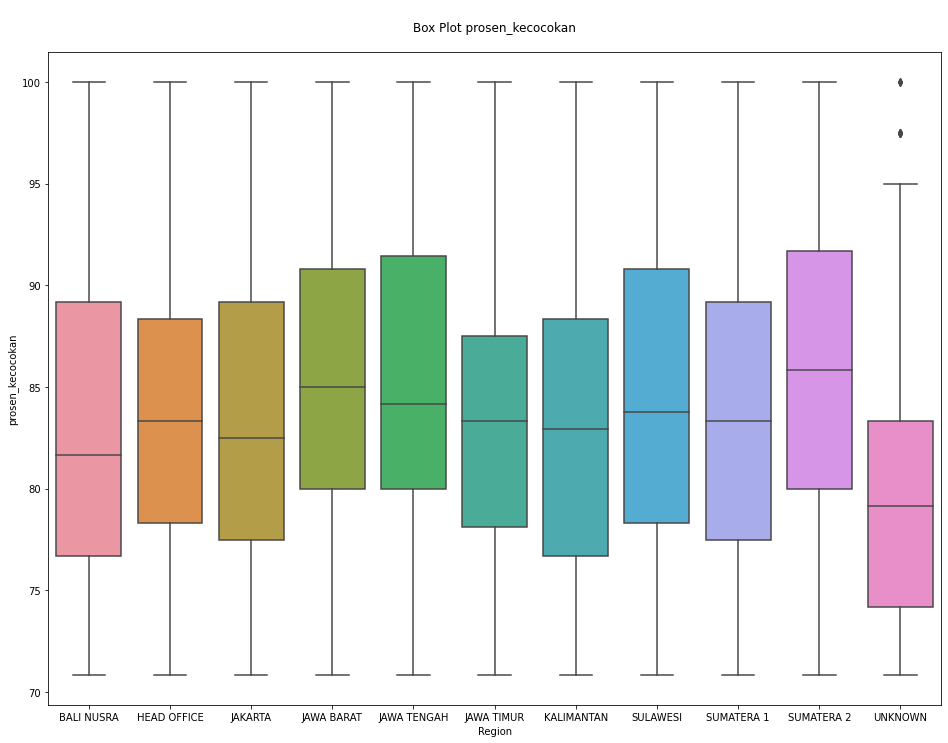

In [14]:
kolom_numerik = ['prosen_kecocokan']  
  
for i in kolom_numerik:  
    plt.figure(figsize=(16,12))  
    ax = sns.boxplot(x = 'Region',y = i, data = data)  
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)  
    plt.savefig('Visualisasi_Hasil_clustering_Numerik.png')
    plt.show()

Jika dilihat dari visualisasi di atas, skor prosen_kecocokan untuk masing-masing daerah memiliki nilai minimum dan maksimum yang sama. Hanya saja terdapat perbedaan pada sebaran variasinya. Daerah Jawa Tengah memiliki sebaran nilai yang tertinggi dibandingkan dengan daerah lainnya. 